In [16]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pymsaviz import MsaViz
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


In [3]:
#Getting Chromosome Lengths From reference genome
from Bio import SeqIO 
ref = r'D:\bioinfo\refs\hg19\hg19.fasta'
chroms = SeqIO.parse(open(ref),'fasta')
c=0
chromLengths=[]
for chrom in chroms:
    
    print(chrom.description.split(':')[-2])
    chromLengths+=[int(chrom.description.split(':')[-2])]
    c+=1
    if c==23:
        break

249250621
243199373
198022430
191154276
180915260
171115067
159138663
146364022
141213431
135534747
135006516
133851895
115169878
107349540
102531392
90354753
81195210
78077248
59128983
63025520
48129895
51304566
155270560


In [5]:
data= pd.read_excel('41587_2015_BFnbt3117_MOESM22_ESM.xlsx')
data.columns = [x.lower() for x in data.columns]
data.columns = [x.replace(' ','_') for x in data.columns]

c:\users\msadegh\appdata\local\programs\python\python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
data.head()

,#chromosome,start,end,name,guide-seq_reads,strand,cells,targetsite,target_sequence,offtarget_sequence,20_bp_protospacer_#_mismatches,3_bp_pam_#_mismatches,mismatch_total
0,chr15,65637530,65637553,VEGFA_site1_chr15_65637537_3237,3237,-,U2OS,VEGFA_site1,GGGTGGGGGGAGTTTGCTCCNGG,GGATGGAGGGAGTTTGCTCCTGG,2,0,2
1,chr6,43737290,43737313,VEGFA_site1_chr6_43737297_2685,2685,-,U2OS,VEGFA_site1,GGGTGGGGGGAGTTTGCTCCNGG,GGGTGGGGGGAGTTTGCTCCTGG,0,0,0
2,chr17,39796321,39796344,VEGFA_site1_chr17_39796328_1935,1935,-,U2OS,VEGFA_site1,GGGTGGGGGGAGTTTGCTCCNGG,TAGTGGAGGGAGCTTGCTCCTGG,4,0,4
3,chr1,99347644,99347667,VEGFA_site1_chr1_99347651_819,819,-,U2OS,VEGFA_site1,GGGTGGGGGGAGTTTGCTCCNGG,GGGGAGGGGAAGTTTGCTCCTGG,3,0,3
4,chr12,131690181,131690204,VEGFA_site1_chr12_131690198_597,597,+,U2OS,VEGFA_site1,GGGTGGGGGGAGTTTGCTCCNGG,GGGAGGGTGGAGTTTGCTCCTGG,2,0,2


In [7]:
data.describe()

,start,end,guide-seq_reads,20_bp_protospacer_#_mismatches,3_bp_pam_#_mismatches,mismatch_total
count,4.430000e+02,4.430000e+02,443.000000,443.000000,443.000000,443.000000
mean,7.169602e+07,7.169604e+07,331.002257,3.451467,0.139955,3.591422
std,5.359852e+07,5.359852e+07,808.629891,1.312752,0.366353,1.277235
min,1.396240e+05,1.396470e+05,2.000000,0.000000,0.000000,0.000000
25%,3.324435e+07,3.324438e+07,12.000000,3.000000,0.000000,3.000000
50%,5.585748e+07,5.585750e+07,38.000000,4.000000,0.000000,4.000000
75%,1.056491e+08,1.056492e+08,231.000000,4.000000,0.000000,4.000000
max,2.422146e+08,2.422146e+08,7539.000000,6.000000,2.000000,6.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   #chromosome                     443 non-null    object
 1   start                           443 non-null    int64 
 2   end                             443 non-null    int64 
 3   name                            443 non-null    object
 4   guide-seq_reads                 443 non-null    int64 
 5   strand                          443 non-null    object
 6   cells                           443 non-null    object
 7   targetsite                      443 non-null    object
 8   target_sequence                 443 non-null    object
 9   offtarget_sequence              443 non-null    object
 10  20_bp_protospacer_#_mismatches  443 non-null    int64 
 11  3_bp_pam_#_mismatches           443 non-null    int64 
 12  mismatch_total                  443 non-null    in

In [10]:
# Creating a dataframe for each individual target (gRNA)
# Creating a dataframe for each individual target (gRNA)
names = data['targetsite'].unique()
dfs = {}
for name in names:
    dfs[name] = data.loc[data['targetsite']==name]
    #print(name," : ",len(dfs[name]))
    #print(f"target sequence:{dfs[name]['target'].unique()}")
    #print()
# Sorting dataframes based on number of Off-targets found 
dfs_sorted = dict(sorted(dfs.items(),key =lambda x:len(x[1]),reverse=True))
#Printing target name, number of OTS
#Printing On target sequence 
tname_tcoordinate={} #target name: target genomic coordinate
for name,df in dfs_sorted.items():
    print(name," : ",len(dfs[name]))
    print(f"Target Sequence:{dfs[name]['target_sequence'].unique()}")
    target= df[df['mismatch_total']==0] 
    tchrom= target["#chromosome"].unique()[0]
    tchromStart=target['start'].unique()[0]
    print(tchrom+":"+str(tchromStart))
    print()

VEGFA_site2  :  152
Target Sequence:['GACCCCCTCCACCCCGCCTCNGG']
chr6:43738555

HEK293_sgRNA4  :  134
Target Sequence:['GGCACTGCGGCTGGAGGTGGNGG']
chr20:31349755

VEGFA_site3  :  60
Target Sequence:['GGTGAGTGAGTGTGTGCGTGNGG']
chr6:43737453

VEGFA_site1  :  22
Target Sequence:['GGGTGGGGGGAGTTTGCTCCNGG']
chr6:43737290

EMX1  :  16
Target Sequence:['GAGTCCGAGCAGAAGAAGAANGG']
chr2:73160981

tru_VEGFA_site3  :  16
Target Sequence:['GAGTGAGTGTGTGCGTGNGG']
chr6:43737456

HEK293_sgRNA1  :  10
Target Sequence:['GGGAAAGACCCAGCATCCGTNGG']
chr9:110103687

tru_VEGFA_site1  :  10
Target Sequence:['GTGGGGGGAGTTTGCTCCNGG']
chr6:43737290

FANCF  :  9
Target Sequence:['GGAATCCCTTCTGCAGCACCNGG']
chr11:22647331

HEK293_sgRNA3  :  6
Target Sequence:['GGCCCAGACTGAGCACGTGANGG']
chr9:110184619

tru_EMX1  :  4
Target Sequence:['GTCCGAGCAGAAGAAGAANGG']
chr2:73160983

HEK293_sgRNA2  :  3
Target Sequence:['GAACACAAAGCATAGACTGCNGG']
chr5:87240596

RNF2  :  1
Target Sequence:['GTCATCTTAGTCATTACCTGNGG']
chr1:185056766

In [11]:
len(names)

13

C:\Users\MSADEGH\AppData\Local\Temp/ipykernel_16832/523074115.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\MSADEGH\AppData\Local\Temp/ipykernel_16832/523074115.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


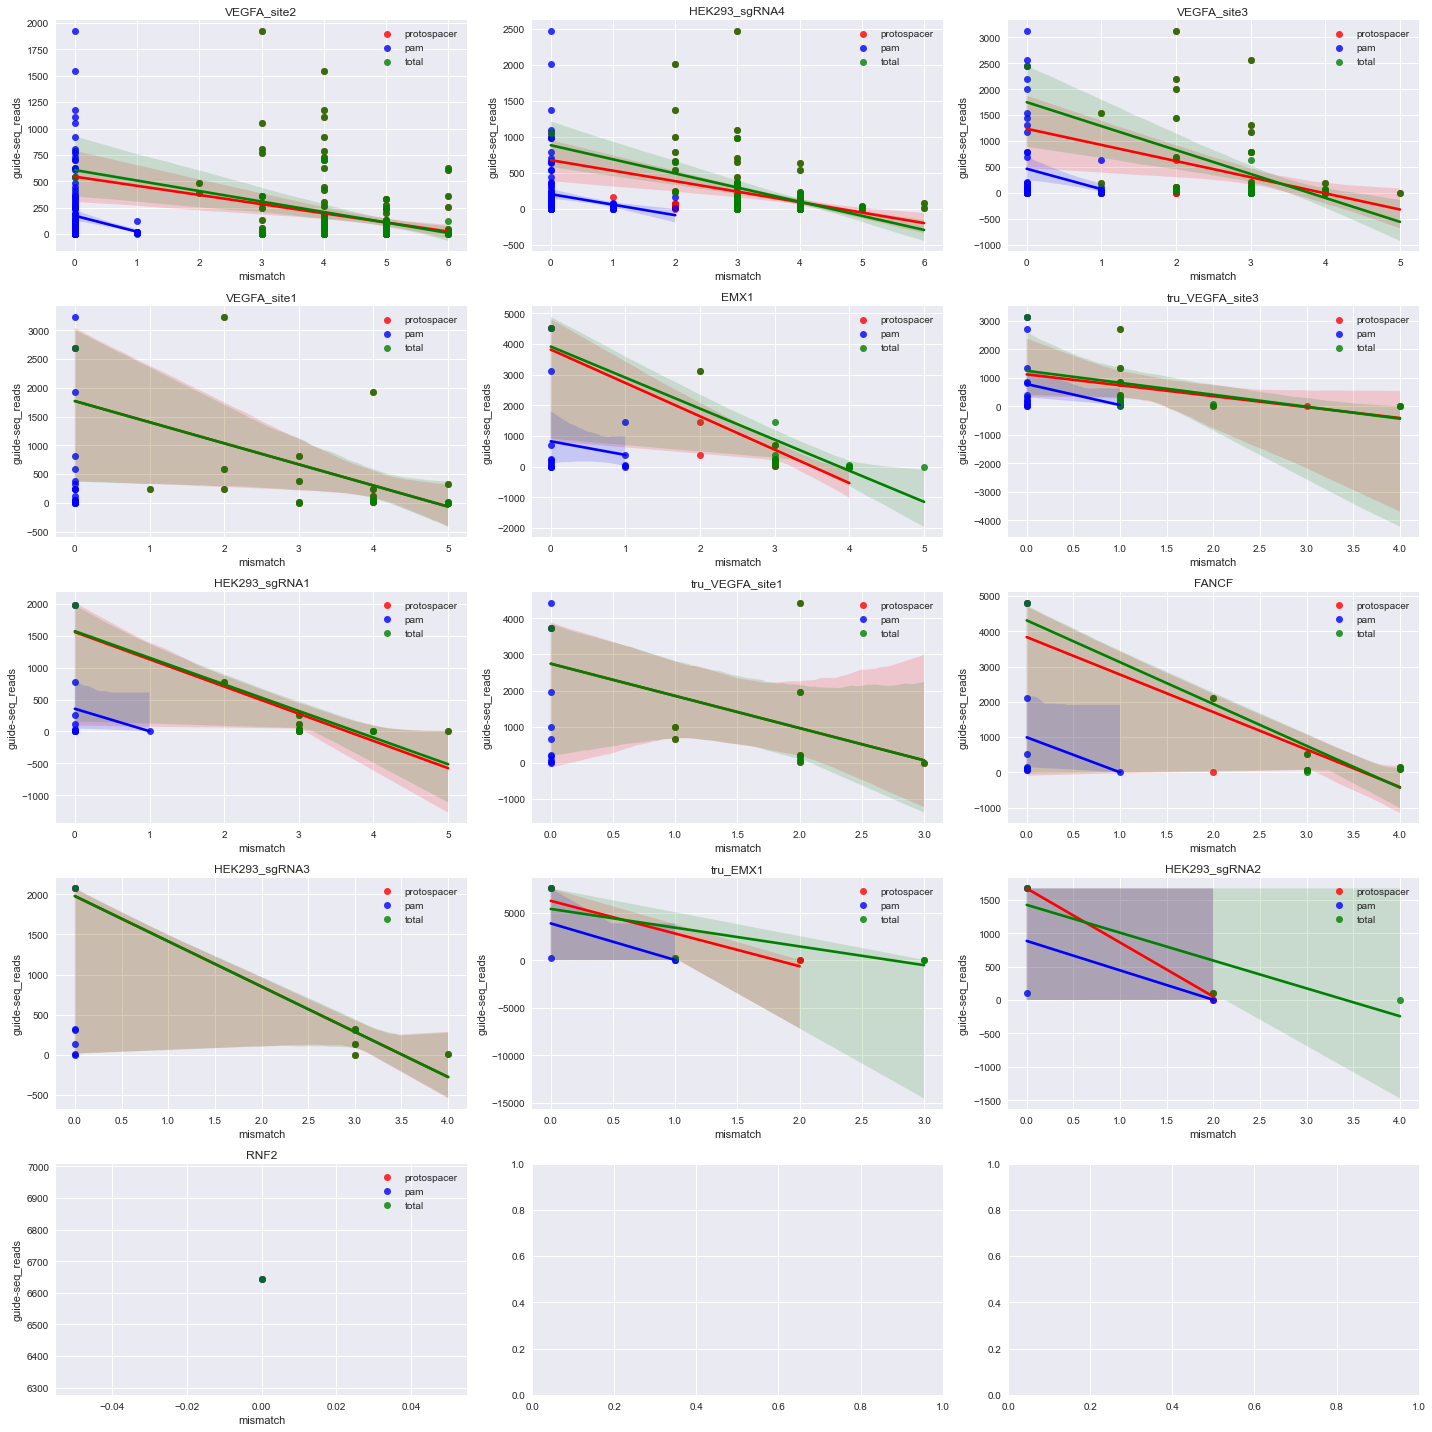

In [12]:

plt.style.use('seaborn')

fig,axs=plt.subplots(5,3,figsize=(20,20))
axs=axs.ravel()
i=0
for df in dfs_sorted.values():
    #print(df)
    name =df['targetsite'].unique()[0]
    #print(name)
#    fig,ax=plt.subplots(figsize=(20,10),sharey=True)


    sns.regplot(y='guide-seq_reads',x='20_bp_protospacer_#_mismatches',
                data=df,ax=axs[i],color='r',label='protospacer')
    sns.regplot(y='guide-seq_reads',x='3_bp_pam_#_mismatches',
                data=df,ax=axs[i],color='b',label='pam')
    sns.regplot(y='guide-seq_reads',x='mismatch_total',
                data=df,ax=axs[i],color='g',label='total')
    axs[i].set_title(name)
    axs[i].set_xlabel('mismatch')
    axs[i].legend()
    i+=1
#    axs[0].legend()
    
    fig.tight_layout()
   # fig.savefig(fr"plots\{name}.png", format='png', dpi=1200)

plt.show()


C:\Users\MSADEGH\AppData\Local\Temp/ipykernel_16832/1305468449.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


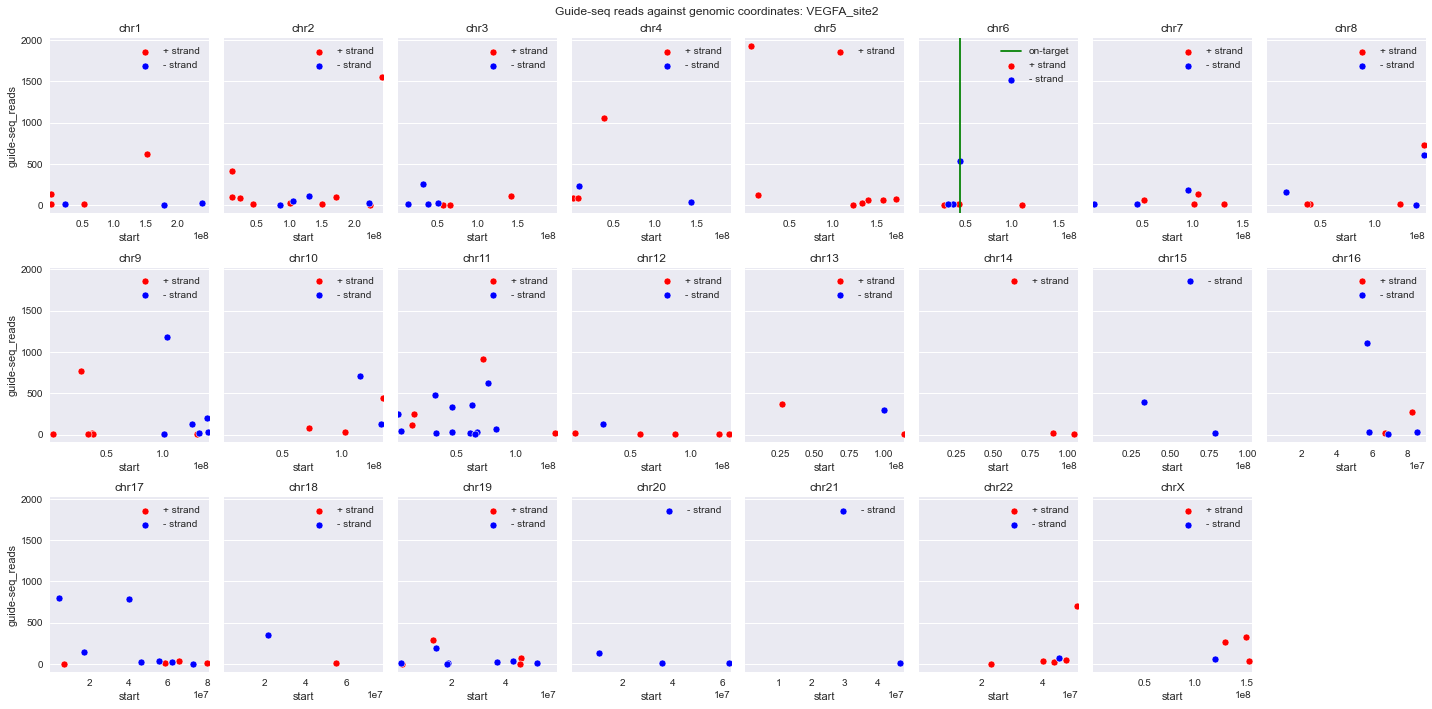

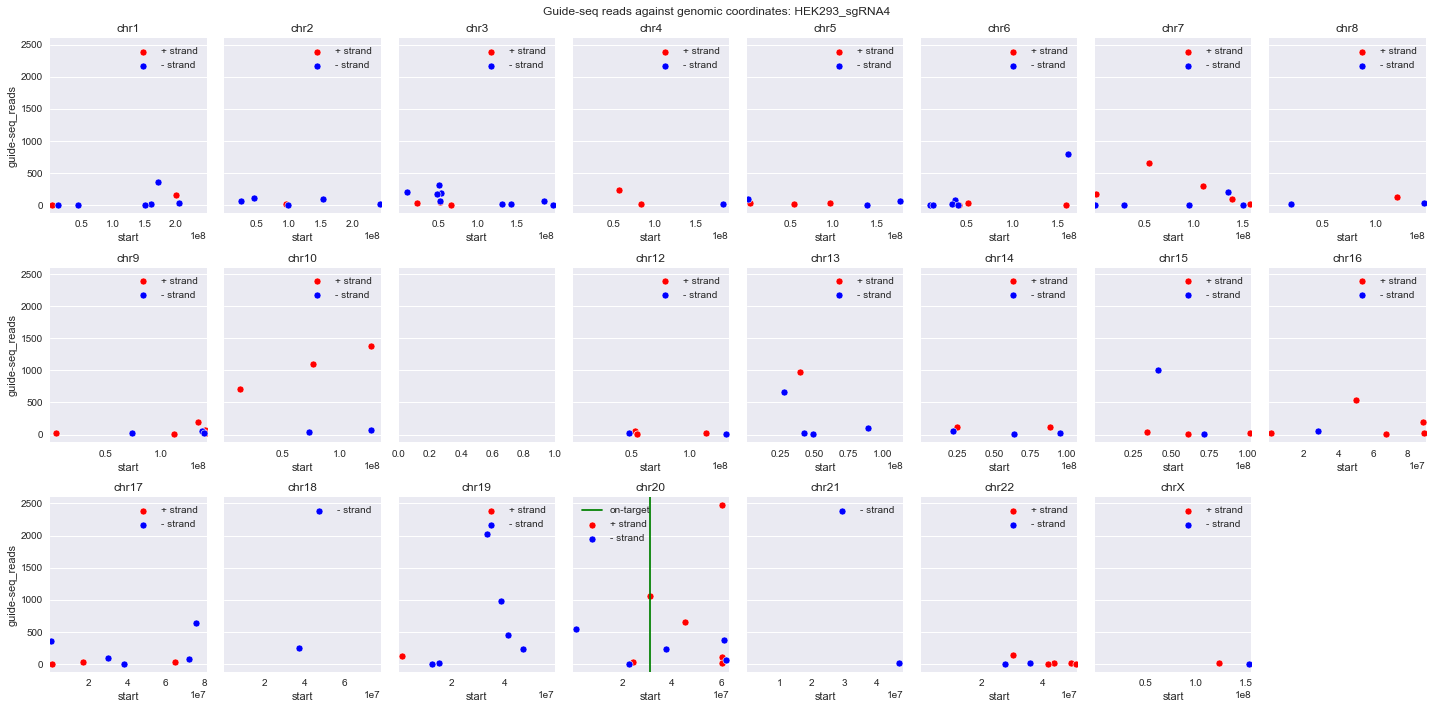

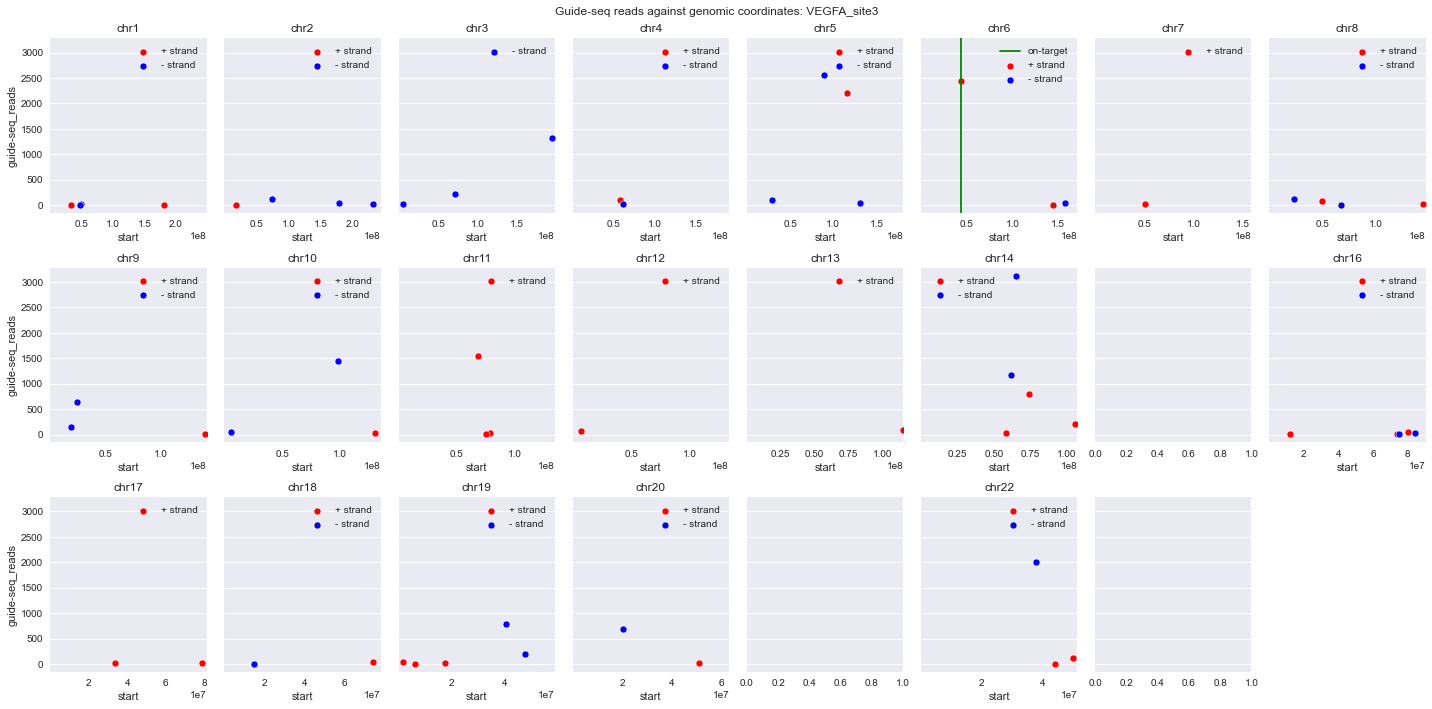

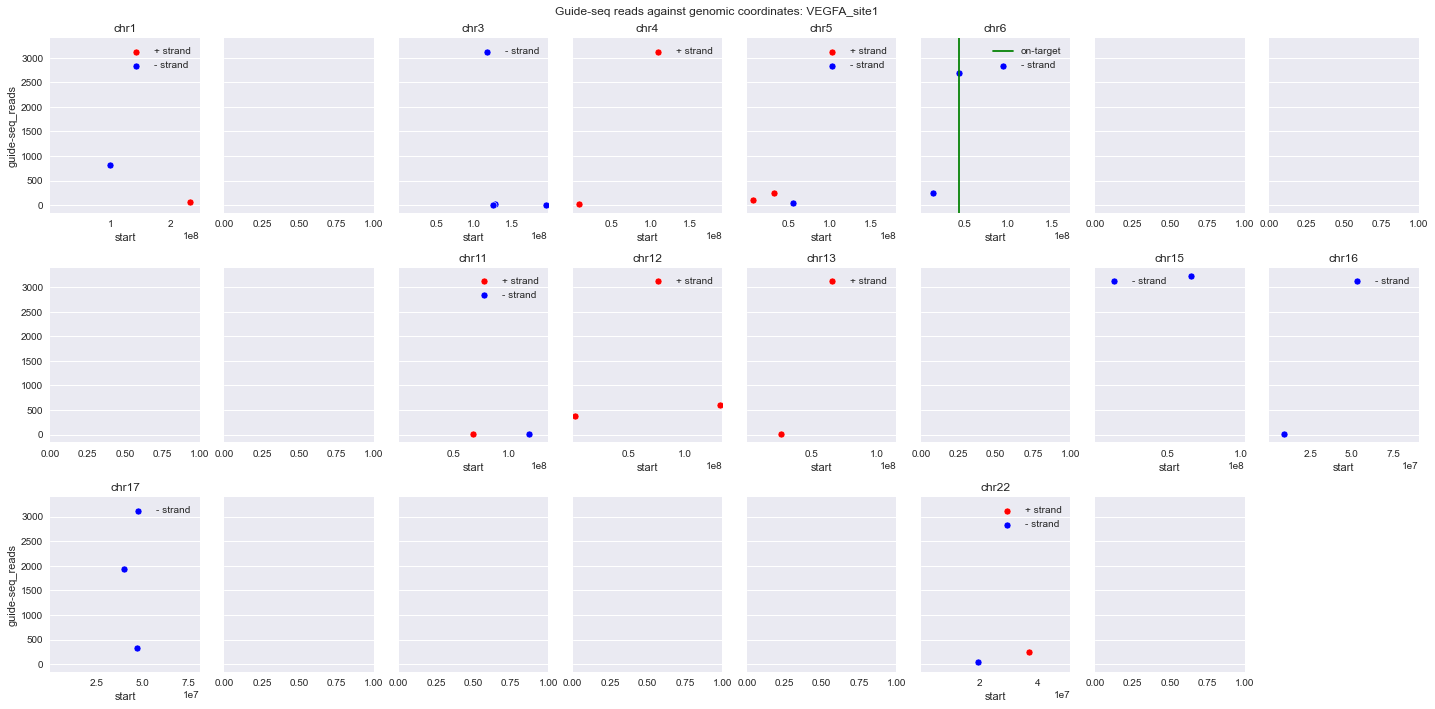

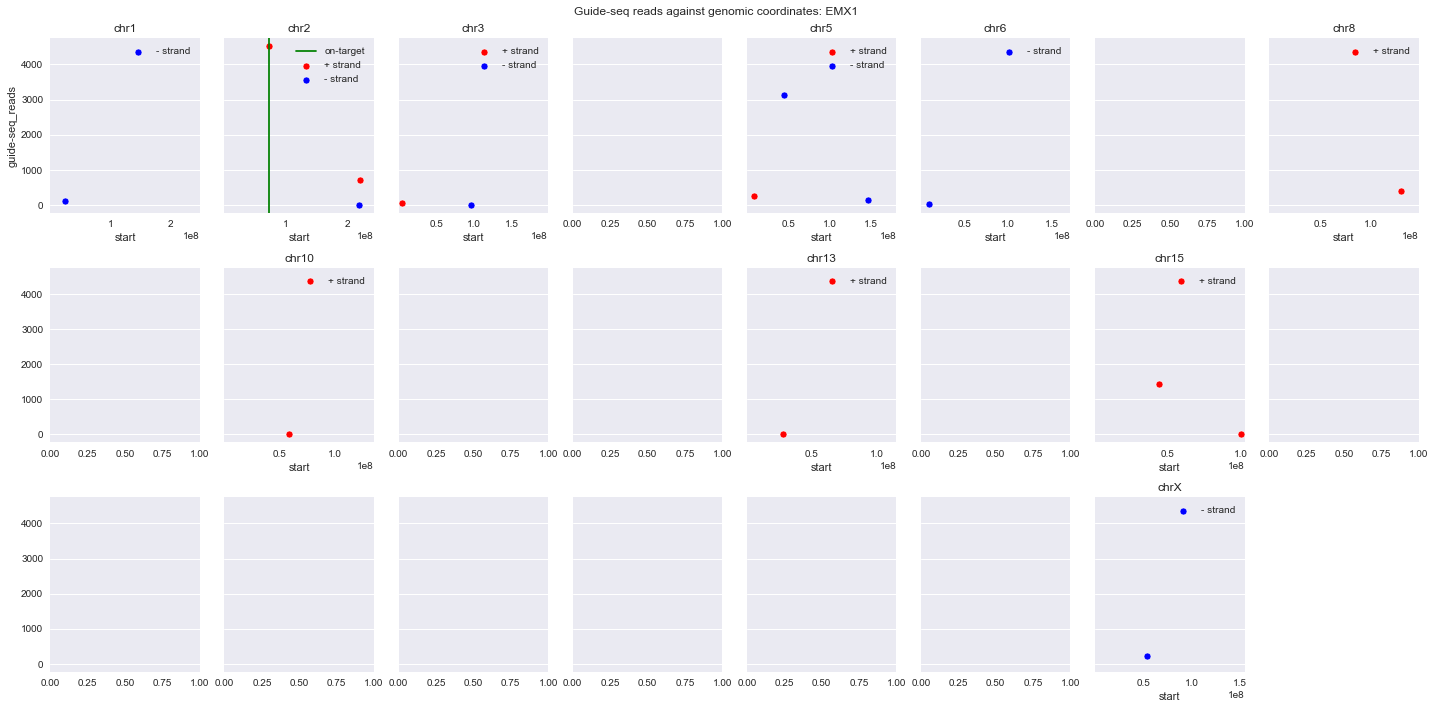

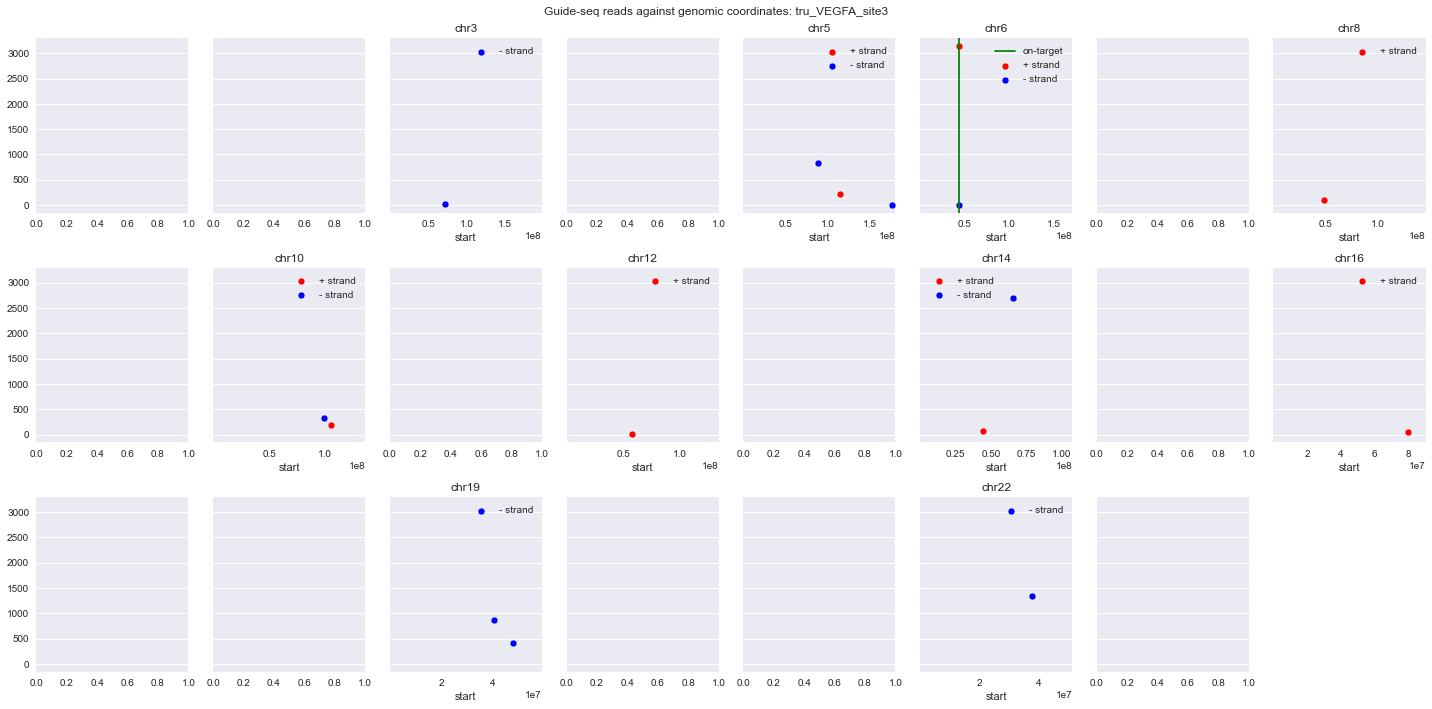

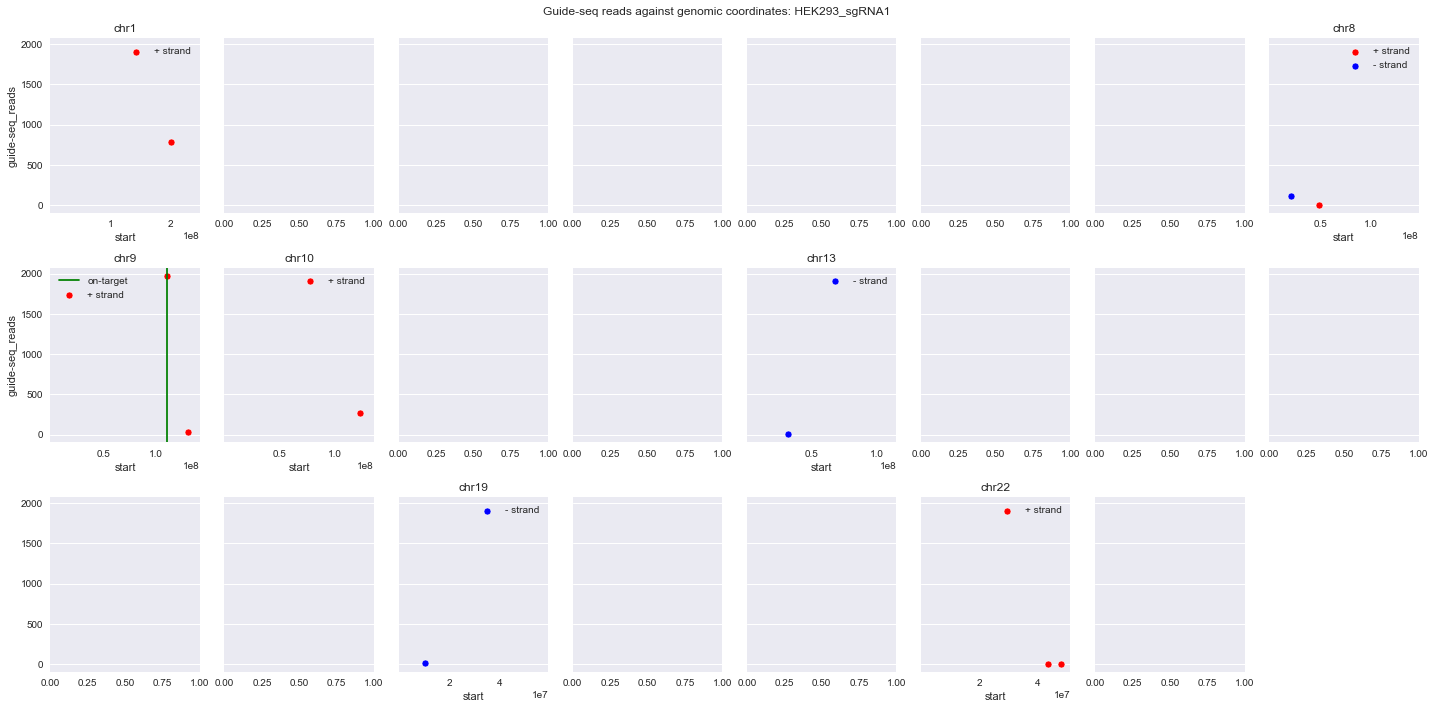

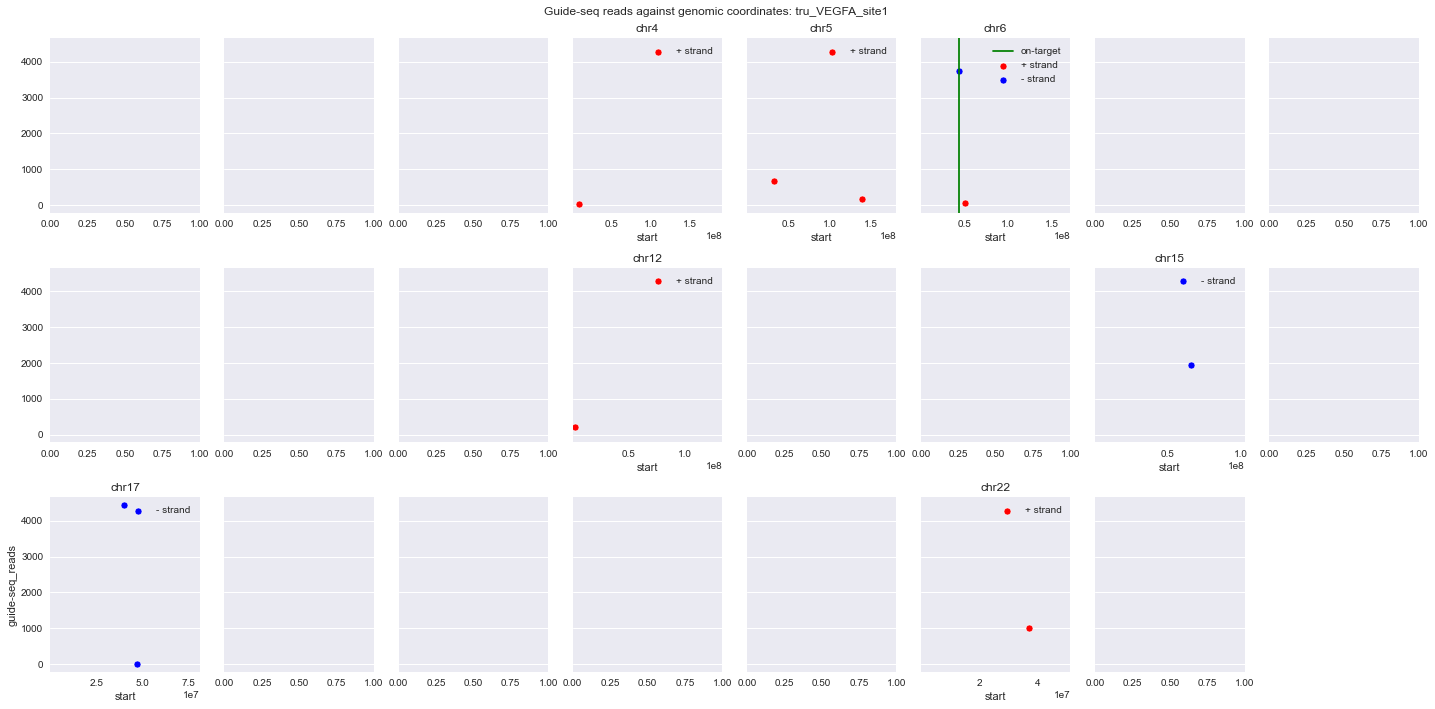

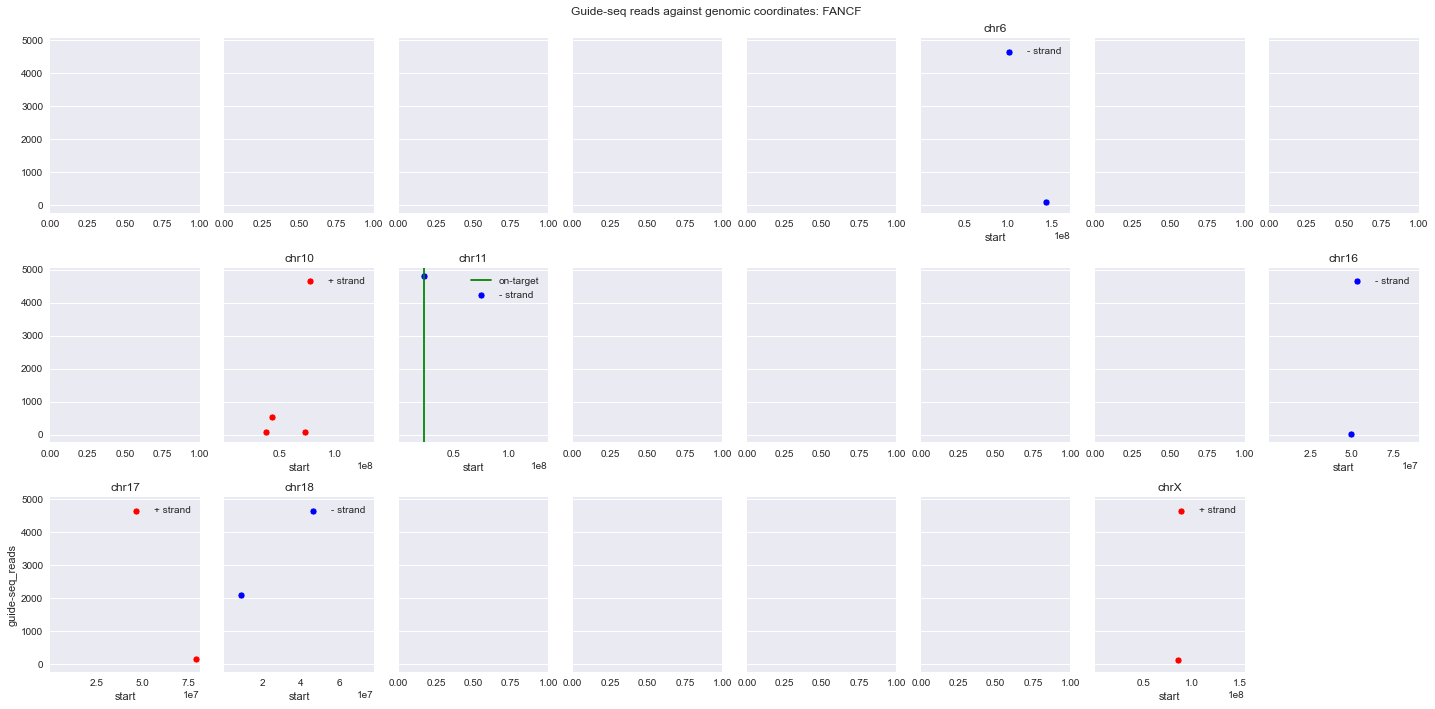

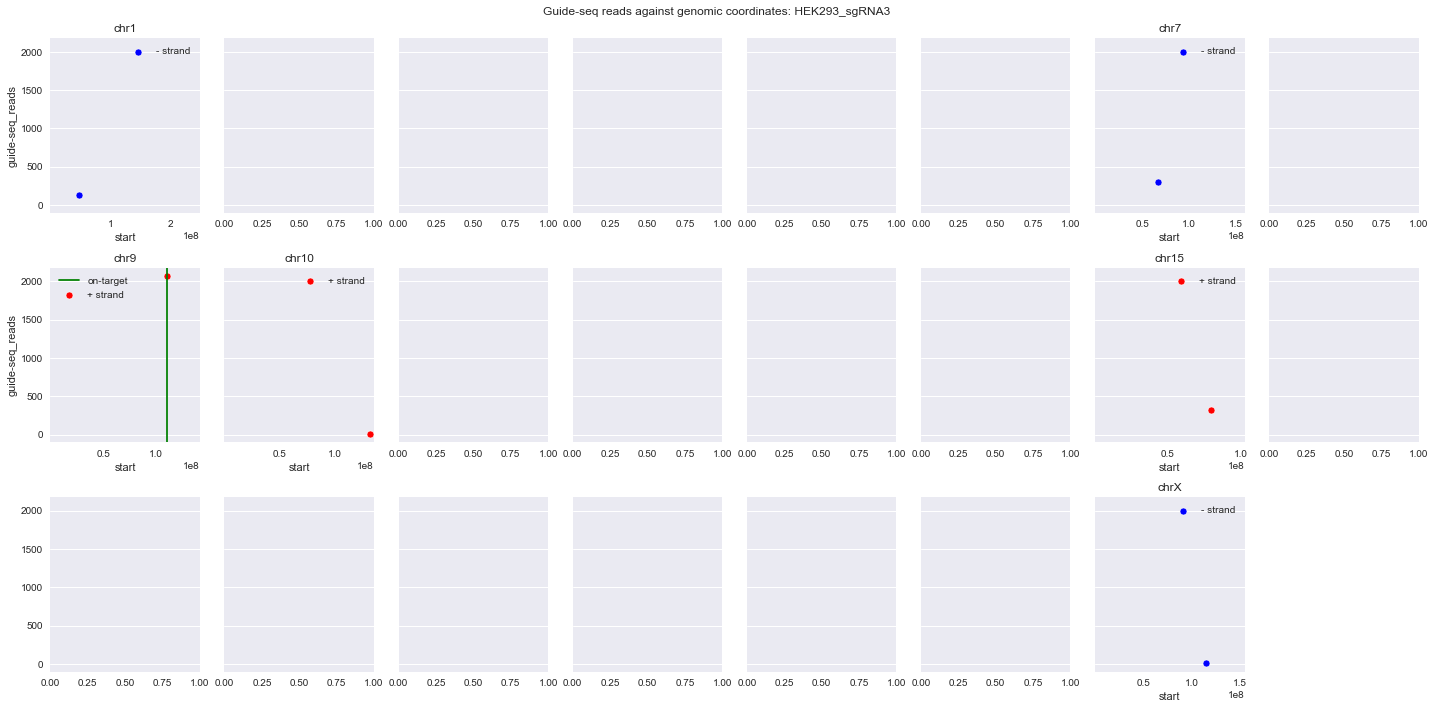

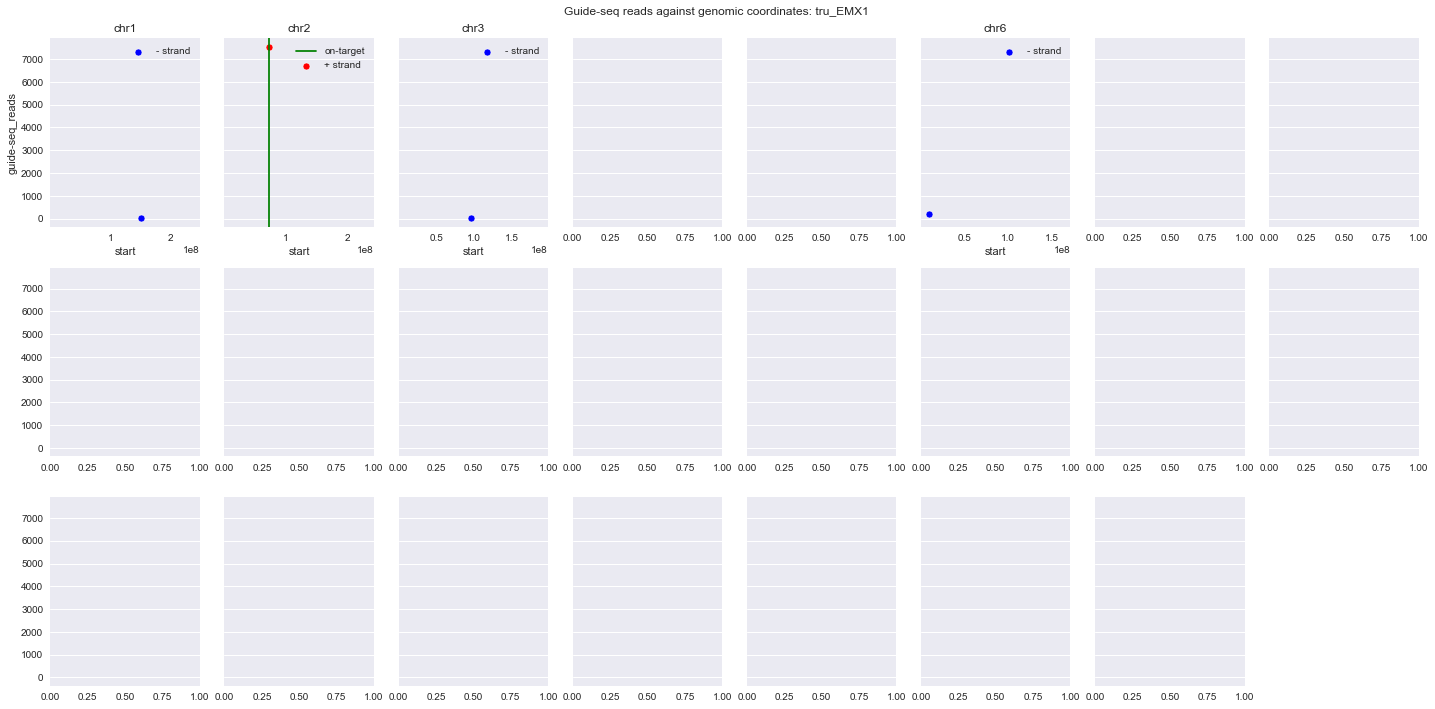

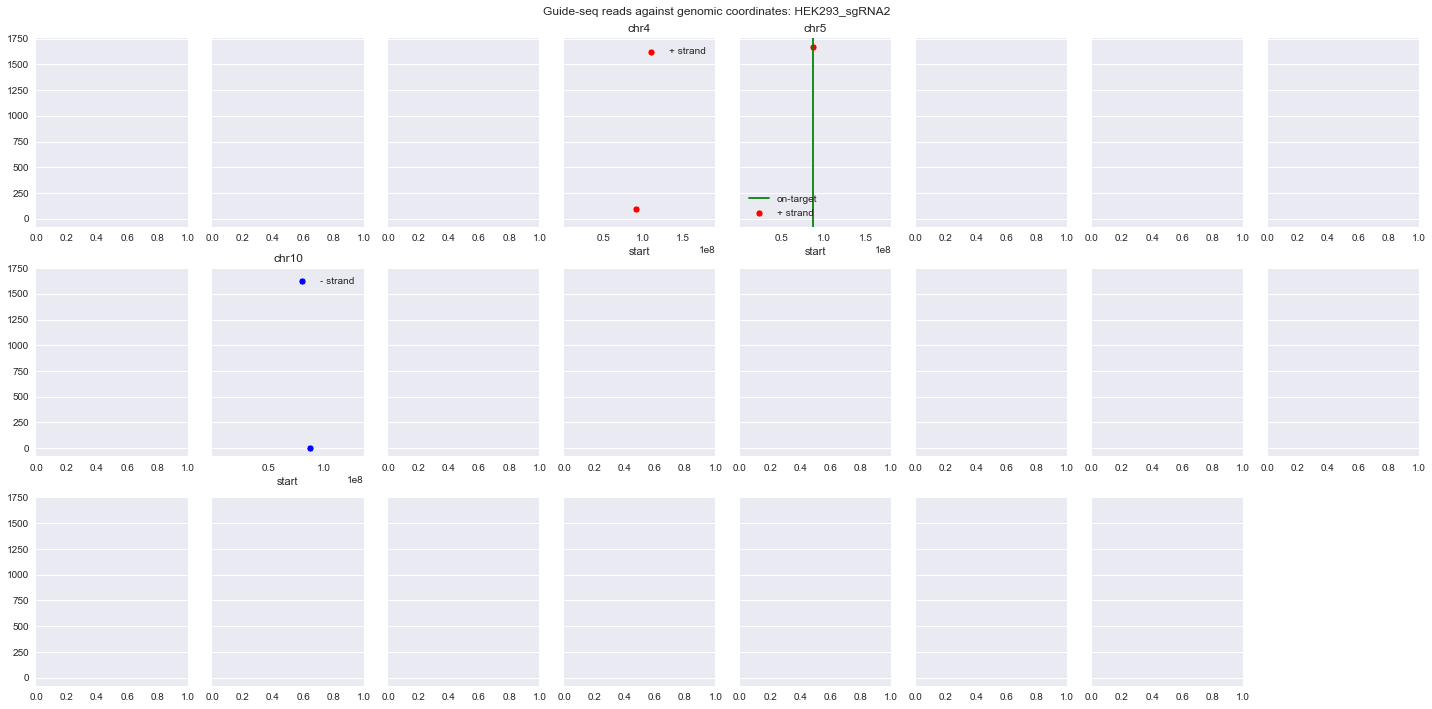

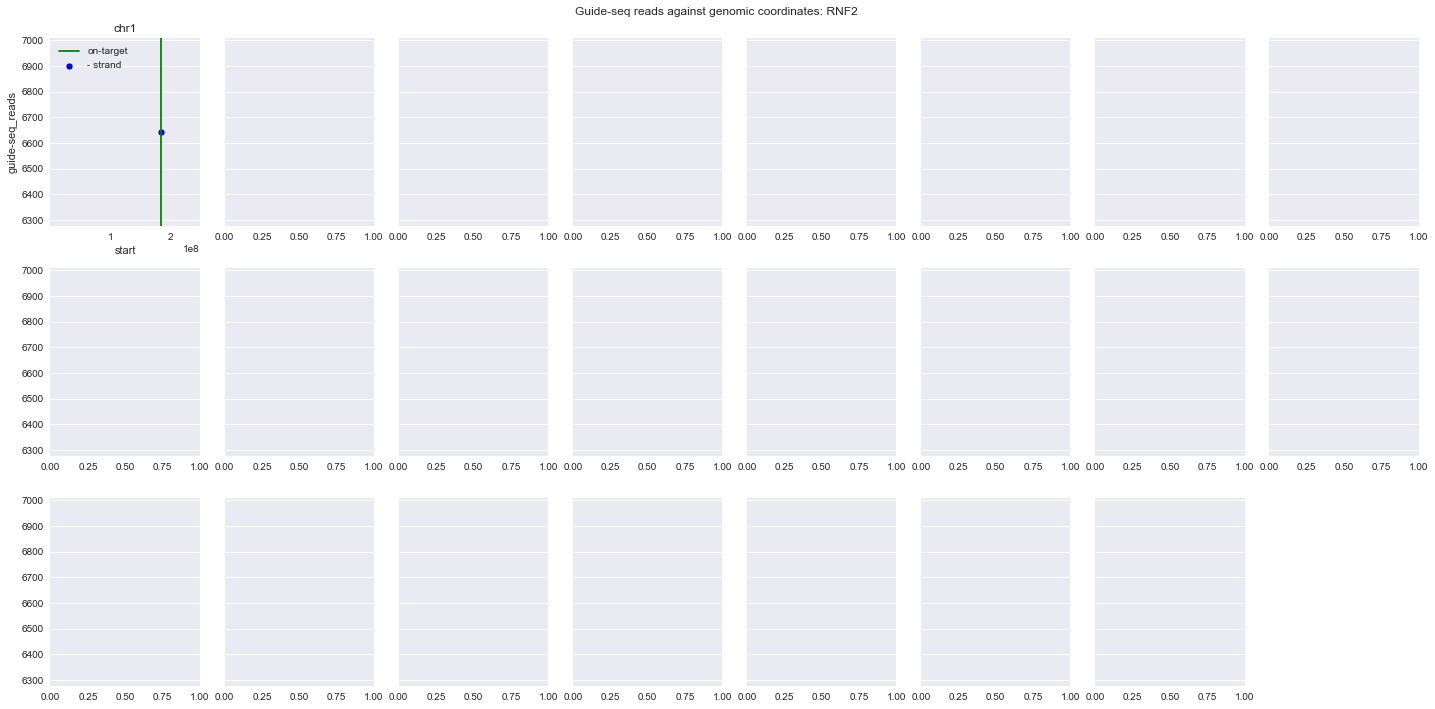

In [13]:

plt.style.use('seaborn')
for df in dfs_sorted.values():
    #print(df)
    name =df['targetsite'].unique()[0]
    #print(name)
    chroms=df.groupby('#chromosome')
    fig,axs=plt.subplots(3,8,figsize=(20,10),sharey=True)
    axs=axs.ravel()
    
    target= df[df['mismatch_total']==0] 
    tchrom= target["#chromosome"].unique()[0]
    tchromStart=target['start'].unique()[0]
    
    for i in range(23):
        if i==22:
            chrom='chr'+'X'
        else:
            chrom= 'chr'+str(i+1)
        if chrom not in chroms.indices:
            axs[i].xaxis.grid(False)
            continue
        else:
            #print(chrom[0])
            axs[i].xaxis.grid(False)

            #axs[i].set_xlabel('chromStart')
            axs[i].set_title(chrom)
            if chrom==tchrom:
                #rint('y')
                #print(f'ontarget:{tchromStart}')
                #print()
                #print(dfs['PDCD1_site_8']['chromStart'])
                axs[i].axvline(tchromStart,color='green',linestyle='-',label='on-target')
                    
            df=chroms.get_group(chrom)
            pos_df=df[df['strand']=='+']
            neg_df=df[df['strand']=='-']
            axs[i].set_xlim(1,chromLengths[i])

                        
            sns.scatterplot(x='start',y='guide-seq_reads',data=pos_df,label='+ strand',ax=axs[i],
                            color='red')
            sns.scatterplot(x='start',y='guide-seq_reads',data=neg_df,label='- strand',ax=axs[i],
                            color='blue')
    
    fig.delaxes(axs[23])
    fig.suptitle(f'Guide-seq reads against genomic coordinates: {name}')

    fig.tight_layout()
   # fig.savefig(fr"pl  ots\{name}.png", format='png', dpi=1200)

    plt.show()


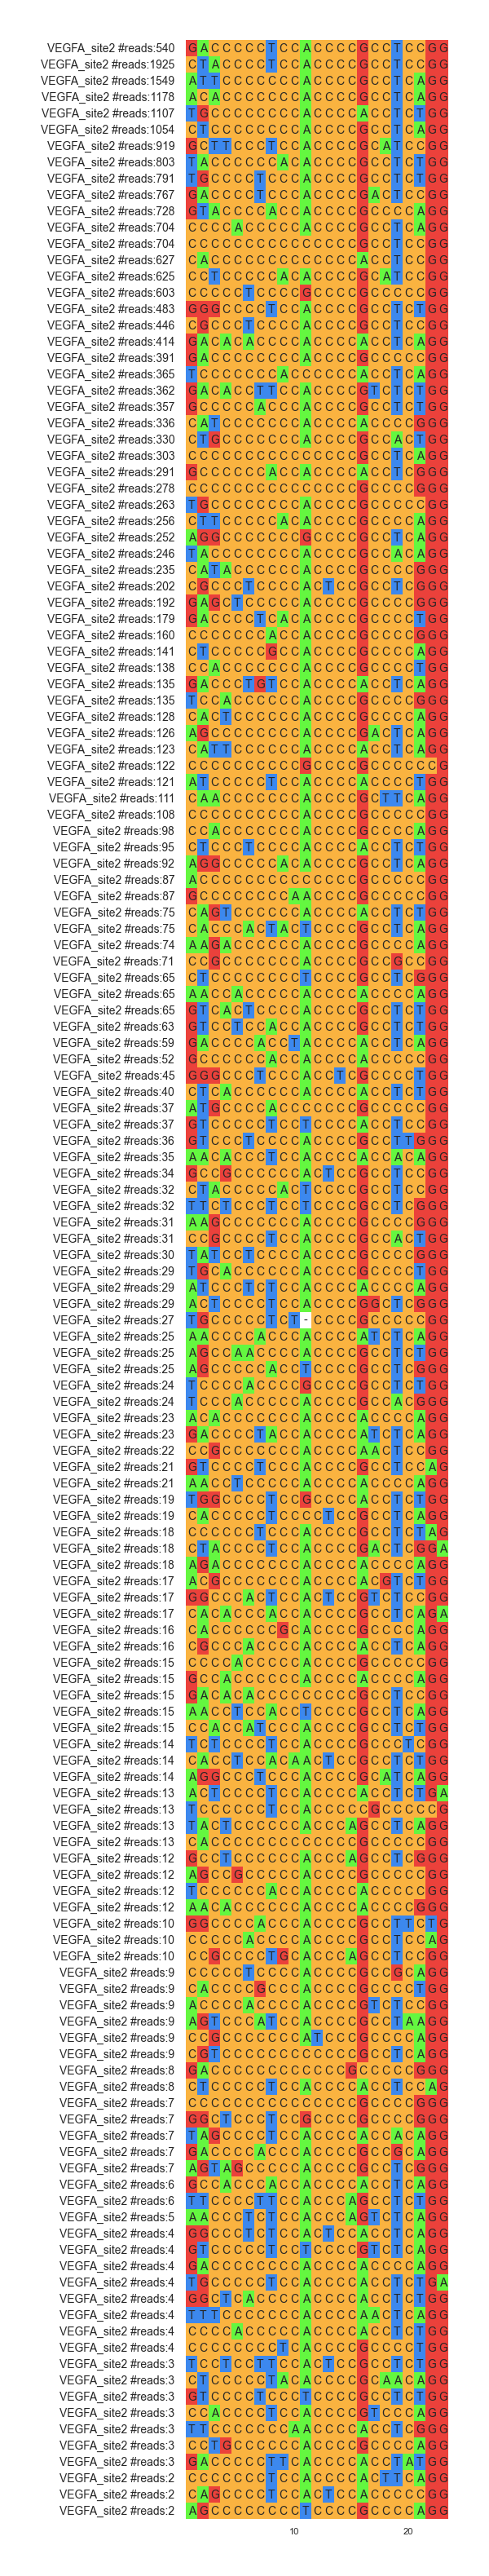

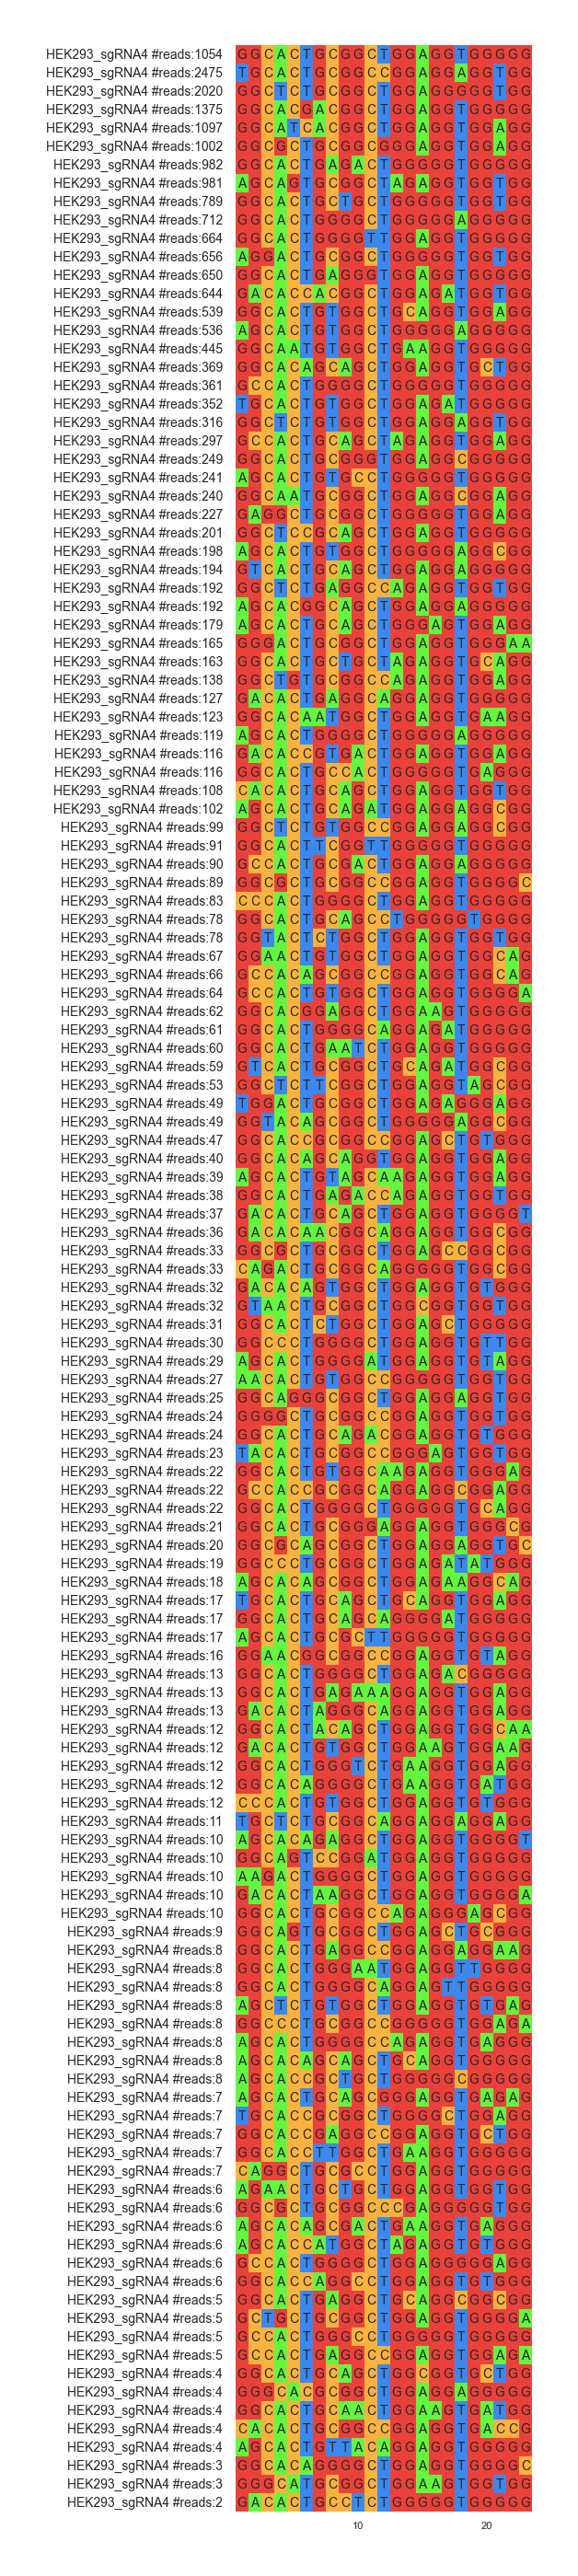

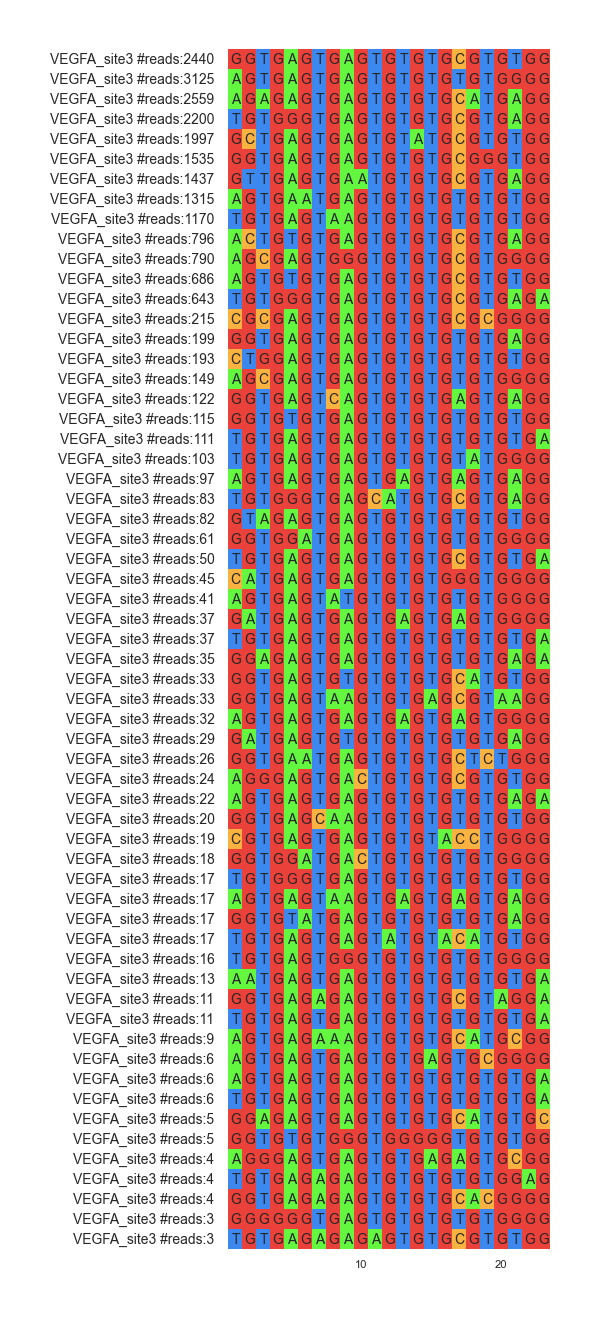

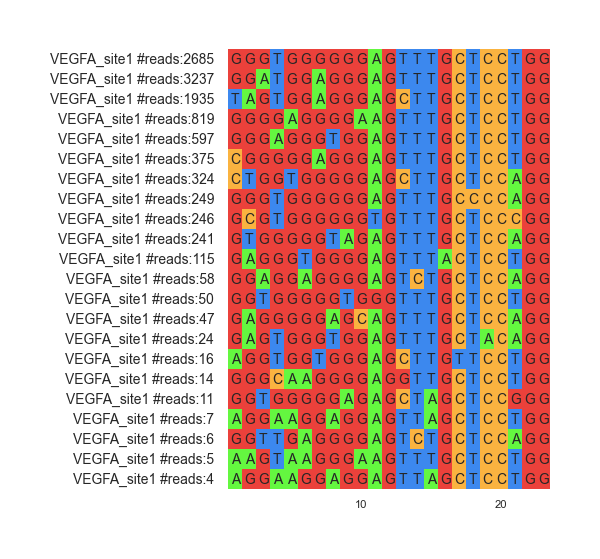

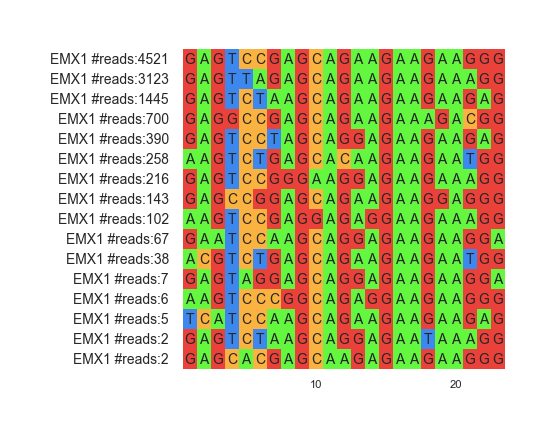

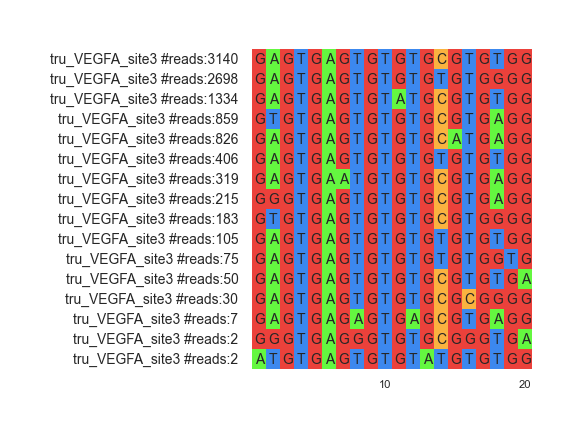

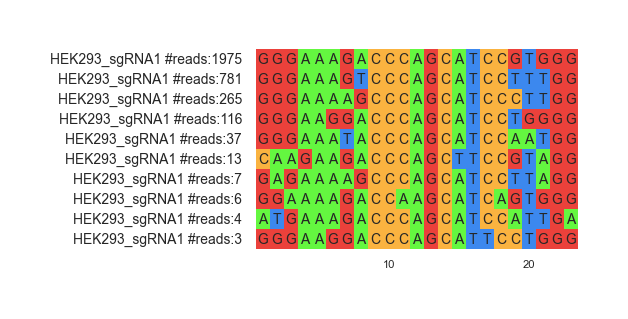

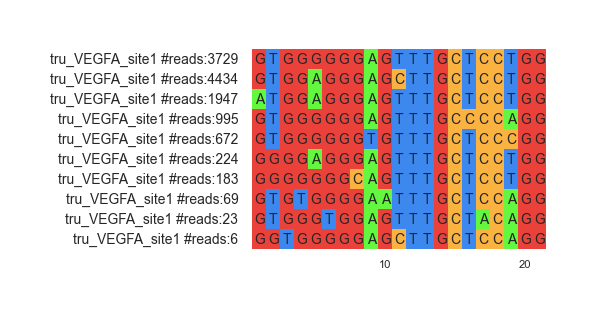

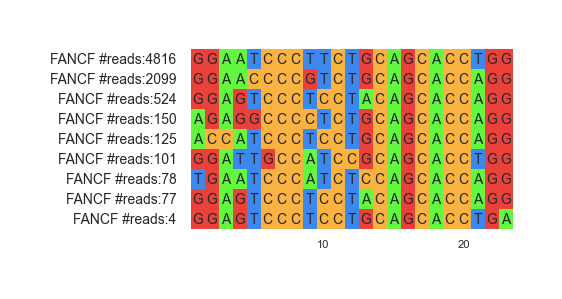

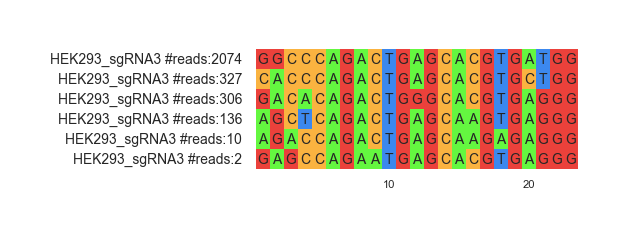

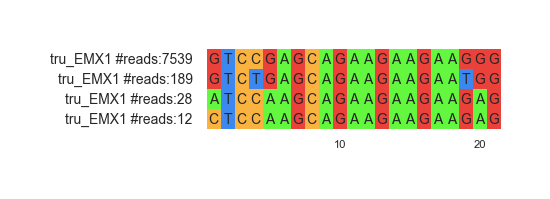

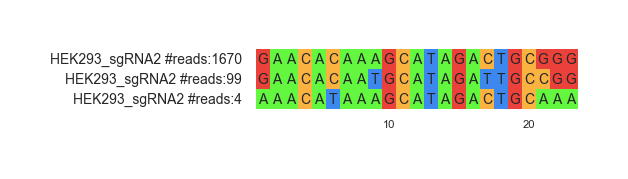

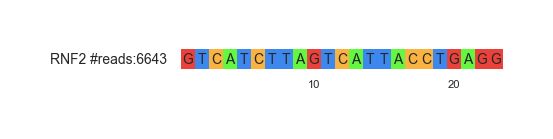

In [22]:
for df in dfs_sorted.values():
    #Moving Target Sequence to the top: (?Weird that an off-target could have more read counts?!)
    target_row = df[df['mismatch_total']==0]
    df = pd.concat([target_row, df.drop(target_row.index)], axis=0).reset_index(drop=True)

    name =df['targetsite'].unique()[0]
    records = (SeqRecord(Seq(row['offtarget_sequence']),id= row['targetsite'],description="#reads:"+str(row['guide-seq_reads'])) for index,row in df.iterrows() )
    
    with open(fr"OT-msa\orig_{name}.fasta",'w') as f:
        SeqIO.write(records,handle=f,format= "fasta")   
    
    with open(fr'OT-msa\orig_{name}.fasta') as f:
        mv = MsaViz(f, wrap_length=25, show_count=False,label_type='description',show_label=True,color_scheme='Nucleotide')
        mv.savefig(fr"OT-msa/orig_{name}.png") #Original guideseq paper            



In [23]:
import re

txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

['ai', 'ai']
